In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# Path to the NetCDF file
fileinput = '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2011.nc'

# Open the dataset
ds = xr.open_dataset(fileinput)

# Coordinates of the center of the burned area
burned_area_lat = 41.709377863541654
burned_area_lon = 1.892273844304144

In [135]:
# 2. Calculate the nearest grid point indices
abs_diff_lat = np.abs(ds.latitude[:,0].values - burned_area_lat)
abs_diff_lon = np.abs(ds.longitude[0,:].values - burned_area_lon)

# Find the index of the nearest grid point
lat_idx = abs_diff_lat.argmin().item()
lon_idx = abs_diff_lon.argmin().item()

In [136]:
ds.latitude[:,0].values

array([20.292281  , 20.33366508, 20.37505942, ..., 63.70871082,
       63.73913522, 63.76951353])

In [137]:
lat_idx, lon_idx

(499, 411)

In [138]:
da = ds.isel(x=lon_idx,y=lat_idx)['si10']

In [139]:
da

<xarray.DataArray 'si10' (valid_time: 1460)> Size: 6kB
[1460 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 12kB 2011-01-01 ... 2011-12-31T18...
    latitude    float64 8B ...
    longitude   float64 8B ...
    expver      (valid_time) <U4 23kB ...
Attributes: (12/35)
    GRIB_paramId:                             207
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1142761
    GRIB_typeOfLevel:                         heightAboveGround
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           10si
    GRIB_units:                               m s**-1
    long_name:                                10 metre wind speed
    units:                                    m s**-1
    standard_name:                            unknown
    GRIB_heightAboveGround:                   10.0

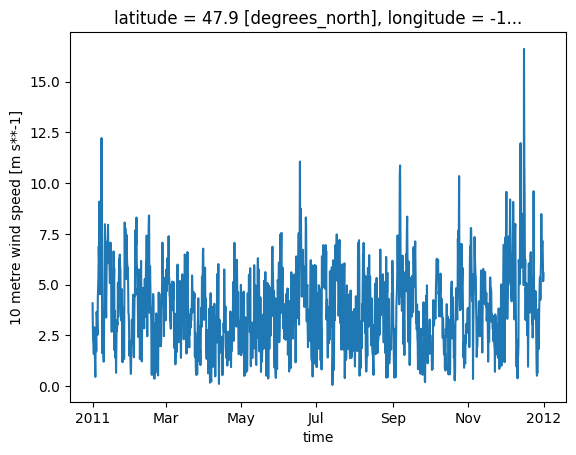

In [140]:
da.plot()

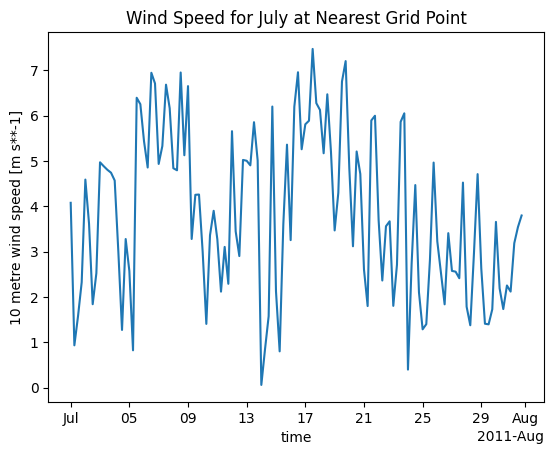

In [141]:
# Now select data only for July using the 'valid_time' and filter for July
july_data = ds.si10.sel(valid_time=ds.valid_time.dt.month == 7)

# Extract wind speed values for July at the nearest grid point
july_wind_speed_at_point = july_data.isel(x=lon_idx, y=lat_idx)

# Plot July data at the nearest grid point
july_wind_speed_at_point.plot()
plt.title("Wind Speed for July at Nearest Grid Point")
plt.show()